## Bivariate plots:

**Scatterplots,** for quantitative variable vs quantitative variable

**Violin plots,** for quantitative variable vs qualitative variable

**Clustered bar charts,** for qualitative variable vs qualitative variable

## Scatterplots & Correlation 

Scatterplots for quantitative variable vs quantitative variable.
In a scatterplots the value of one variable are indicated by position on ths x-axis and values of the other variable are indicated by position on the y-axis.
The statistics take a value between negative one and one. Positivie numbers indicate relationship where positive changes in one variable are associated with positive changes in the second. Wile negative numbers indicated that when one variable increases, the second variable tends to decrease. Values close to the extreme of negative one or one indicate a stronger more relatinship while values close to zero indicate a weaker relationship. The correlation coefficient does not necessarily tell you anything about the steepness of a line that models the relationship, and most importantly the Pearson correlation coefficient only captures linear relationships. 

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [100]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


Let´s investigate the relationship between 2 terms ussin the scatterplot. (scatter function)

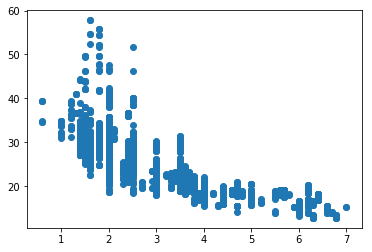

In [101]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');

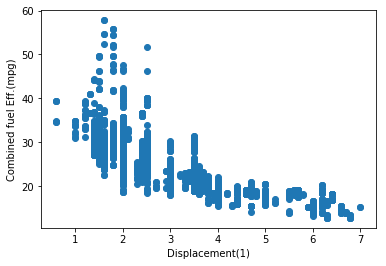

In [102]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement(1)')
plt.ylabel('Combined fuel Eff.(mpg)');

Scatter combinen hith line regression

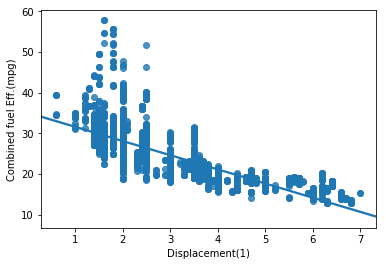

In [103]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement(1)')
plt.ylabel('Combined fuel Eff.(mpg)');

Looking at the line you can see how the cars with lower displacements, and higher efficiency bring up the left side of the line. 

## Overplotting, Transparency, and Jitter

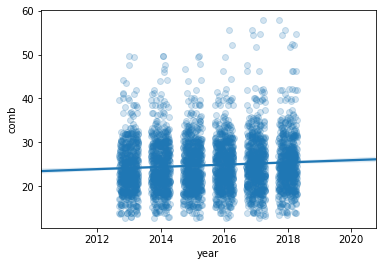

In [104]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3, scatter_kws={'alpha':1/5});
#the 0.3 value mean that each x value will be adjust randomly up to 0.3 more or less. 
#it should be noted that this only works with Seaborn´s regplot funtion and not in matplotlib´s scatter
#to see clearly we will add some transparencia, where 0 is totally clear and 1 es fully opaque.

It´s a good starts. But the interesting centre areas still being indistinguishable.

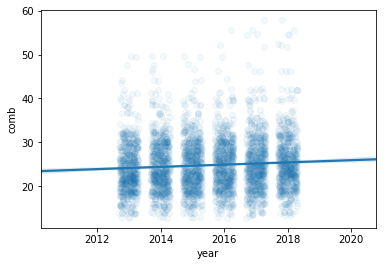

In [105]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3, scatter_kws={'alpha':1/20});

It is a little bit better now. Darker areas naturally come about as an outcome of transparent points overlapping, and these areas slightly rise in valu across the years. Note: The regression line has´n changed a little bit.

## Heat Maps

In a heat maps the field is devided into a grid of cells, the numbers of data points in each cell is counted up.Each cell is done fiven a color based on the counter value. (The more data points in a grid cell, the darker the color). A heatmap is like a 2D versio of a histogram. Looking at the data like a top-down perspective. 

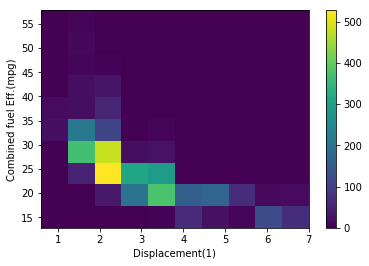

In [106]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined fuel Eff.(mpg)');

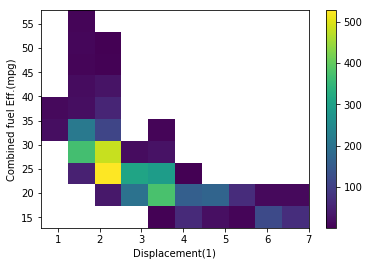

In [107]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5); #cmin=areas without number get incolor.
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined fuel Eff.(mpg)');

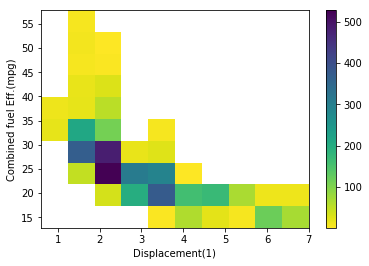

In [108]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap = 'viridis_r');
#cmap = 'viridis_r', under score _r indicated a reverse color map.
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined fuel Eff.(mpg)');

In [109]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


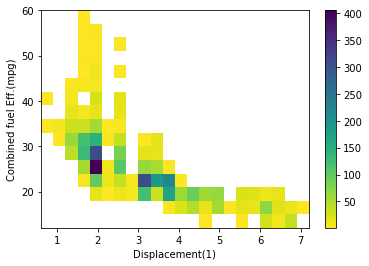

In [110]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3,3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap = 'viridis_r', bins = [bins_x, bins_y]); 
#cmin=areas without number get incolor.
#cmap = 'viridis_r', under score _r indicated a reverse color map.
plt.colorbar()
plt.xlabel('Displacement(1)')
plt.ylabel('Combined fuel Eff.(mpg)');

## Violin plots

For quantitative variable vs qualitative variable

In [111]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


In [112]:
#base_color = sb.color_palette()[0]
#sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, inner = None);
#plt.xticks(rotation = 15);

In [113]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

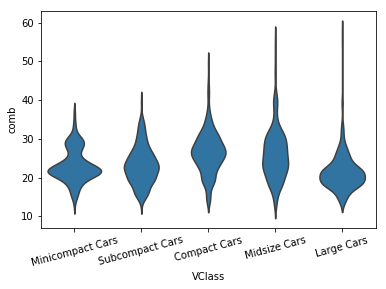

In [114]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, inner = None);
plt.xticks(rotation = 15);

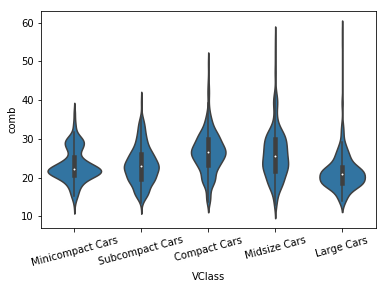

In [115]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);

We will use box plot to summarize that relationship

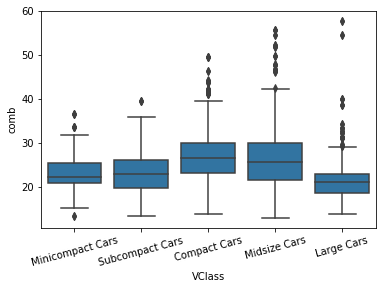

In [116]:
base_color = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);

The botton of each box, indicate the first quartile and the top of each box, the thrid quartile. The central line is the median of each group. Whiskers branch out toward the the min and max and each group with outliers despicted as individual points past a maximum whisker lenght.

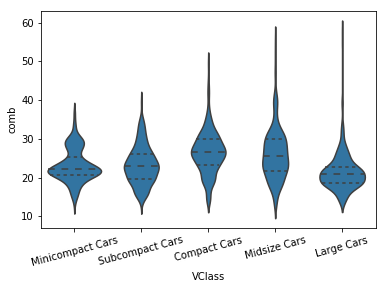

In [117]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

I chose a clustered bar chart instead of a heat map in this case since there weren't a lot of numbers to plot. If you chose a heat map, did you remember to add a color bar and include annotations? From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.


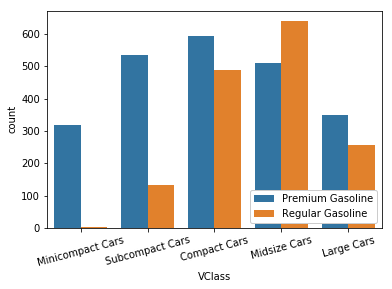

In [128]:
sol_string = ["I chose a clustered bar chart instead of a heat map in this case",
                  "since there weren't a lot of numbers to plot. If you chose a heat",
                  "map, did you remember to add a color bar and include annotations?",
                  "From this plot, you can see that more cars use premium gas over",
                  "regular gas, and that the smaller cars are biased towards the",
                  "premium gas grade. It is only in midsize sedans where regular",
                  "gasoline was used in more cars than premium gasoline."]
print((" ").join(sol_string))
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
else: # pre-v0.21
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True,
                                                         categories = sedan_classes)
fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]

    # plotting
ax = sb.countplot(data = fuel_econ_sub, x = 'VClass', hue = 'fuelType')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15);

Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the manufacturers by average mileage, and wrapped the faceting into a six column by three row grid. One interesting thing to note is that there are a very large number of BMW cars in the data, almost twice as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change the axes to be in terms of relative frequency or density to normalize the axes, making the less-frequent manufacturers easier to read.


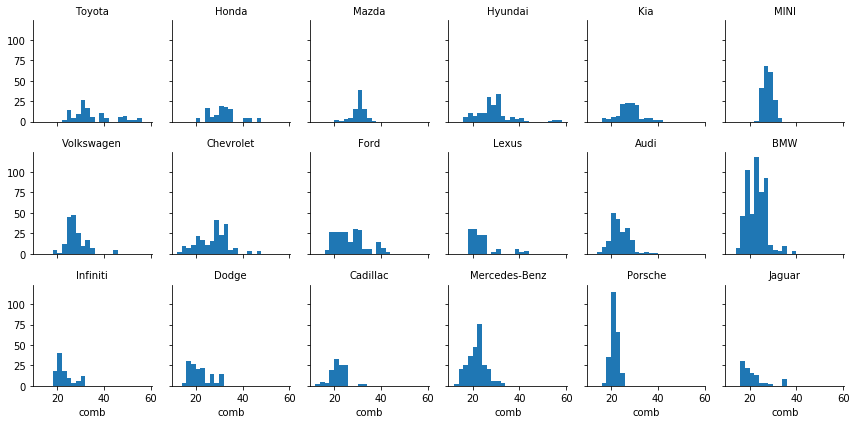

In [130]:
sol_string = ["Due to the large number of manufacturers to plot, I've gone",
                  "with a faceted plot of histograms rather than a single figure",
                  "like a box plot. As part of setting up the FacetGrid object, I",
                  "have sorted the manufacturers by average mileage, and wrapped",
                  "the faceting into a six column by three row grid. One interesting",
                  "thing to note is that there are a very large number of BMW cars",
                  "in the data, almost twice as many as the second-most prominent",
                  "maker, Mercedes-Benz. One possible refinement could be to change",
                  "the axes to be in terms of relative frequency or density to",
                  "normalize the axes, making the less-frequent manufacturers",
                  "easier to read."]
print((" ").join(sol_string))
most_makes = fuel_econ['make'].value_counts().index[:18]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

    # plotting
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, size = 2,
                     col_order = comb_order)
    # try sb.distplot instead of plt.hist to see the plot in terms of density!
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}');

Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels, I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard deviation of the car mileages.


Text(0.5,0,'Average Combined Fuel Eff. (mpg)')

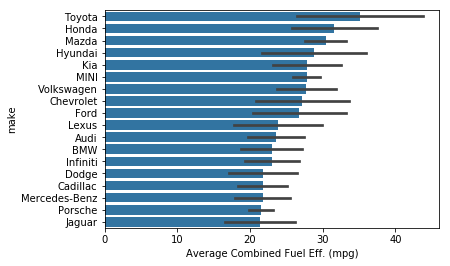

In [132]:
sol_string = ["Seaborn's barplot function makes short work of this exercise.",
                  "Since there are a lot of 'make' levels, I've made it a horizontal",
                  "bar chart. In addition, I've set the error bars to represent the",
                  "standard deviation of the car mileages."]
print((" ").join(sol_string))


most_makes = fuel_econ['make'].value_counts().index[:18]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

    # plotting
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
               color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')

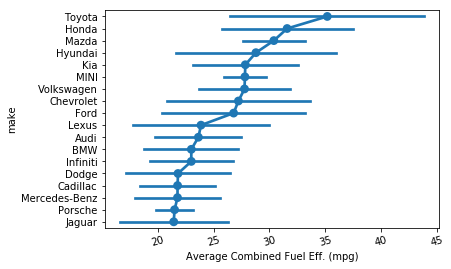

In [143]:
sb.pointplot(data = fuel_econ_sub, x = 'comb', y = 'make', order = comb_order, ci = 'sd')
plt.xticks(rotation = 15)
plt.xlabel('Average Combined Fuel Eff. (mpg)');

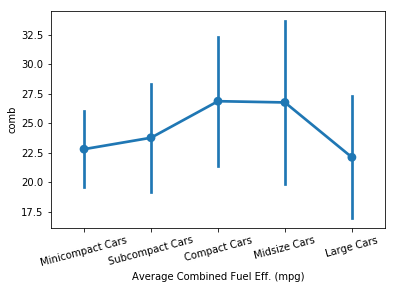

In [145]:
sb.pointplot(data = fuel_econ_sub, x = 'VClass', y = 'comb', ci = 'sd', linestyle = "")
plt.xticks(rotation = 15)
plt.xlabel('Average Combined Fuel Eff. (mpg)');

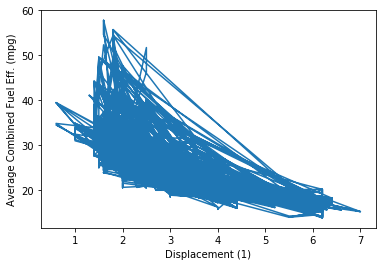

In [177]:
plt.errorbar(data = fuel_econ_sub, x = 'displ', y = 'comb')
plt.ylabel('Average Combined Fuel Eff. (mpg)');
plt.xlabel('Displacement (1)');

In [172]:
pd.cut(fuel_econ['displ'], bins_c, include_lowest = True)
fuel_econ['comb'].groupby(displ_binned).mean()

displ
(0.699, 0.9]          NaN
(0.9, 1.1]      33.469158
(1.1, 1.3]      36.767192
(1.3, 1.5]      32.101316
(1.5, 1.7]      29.370004
(1.7, 1.9]      31.996801
(1.9, 2.1]      27.562585
(2.1, 2.3]      23.509909
(2.3, 2.5]      28.051885
(2.5, 2.7]      20.227183
(2.7, 2.9]      22.030114
(2.9, 3.1]      22.469961
(3.1, 3.3]      21.682504
(3.3, 3.5]      23.357370
(3.5, 3.7]      21.333165
(3.7, 3.9]      20.246324
(3.9, 4.1]      19.065380
(4.1, 4.3]      17.232710
(4.3, 4.5]      18.239393
(4.5, 4.7]      18.737073
(4.7, 4.9]      18.383695
(4.9, 5.1]      18.054693
(5.1, 5.3]      16.481675
(5.3, 5.5]      17.723819
(5.5, 5.7]      18.525772
(5.7, 5.9]      15.924500
(5.9, 6.1]      15.158515
(6.1, 6.3]      15.945843
(6.3, 6.5]      17.585494
(6.5, 6.7]      14.390930
(6.7, 6.9]      13.166571
Name: comb, dtype: float64

In [179]:
bins_e = np.arange(0.7, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_c, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()

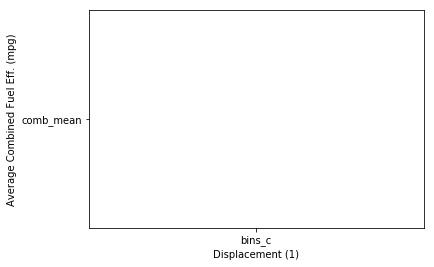

In [180]:
plt.errorbar(x = 'bins_c', y = 'comb_mean')
plt.xlabel('Displacement (1)');
plt.ylabel('Average Combined Fuel Eff. (mpg)');
